In [1]:
import numpy as np                  # Scientific Computing Library
import matplotlib.pyplot as plt     # Basic Visualization Library

In [50]:
# Read in data
path = r'Presense Applied Radar\assets\doppler_example_1.npy'
frame = np.load(path)
# Manually cast to signed ints
frame.real = frame.real.astype(np.int16)
frame.imag = frame.imag.astype(np.int16)

print(f'Shape of frame: {frame.shape}')

# Data configuration
num_chirps = 128
num_samples = 128  # Per Chirp ADC sampples

num_rx = 4
num_tx = 2
num_vx = num_tx * num_rx # Number of virtual antennas
# Chirps x virtual antennas x ADC samples

Shape of frame: (128, 8, 128)


In [51]:
range_plot = np.fft.fft(frame, axis=2)
range_plot = np.abs(range_plot).sum(1)

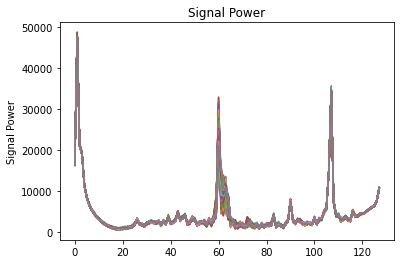

In [52]:
# Visualize Results
plt.plot(np.abs(range_plot).T)
plt.ylabel('Signal Power')
plt.title('Signal Power')
plt.show()

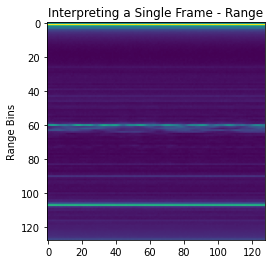

In [53]:
# Visualize Results
plt.imshow(np.abs(range_plot).T)
plt.ylabel('Range Bins')
plt.title('Interpreting a Single Frame - Range')
plt.show()

In [54]:
range_fft = np.fft.fft(frame, axis=2)
range_doppler = np.fft.fft(range_fft, axis=0)
range_doppler = np.fft.fftshift(range_doppler, axes=0)
range_doppler = np.log(np.abs(range_doppler)).sum(1)
#range_doppler = np.log(np.abs(range_doppler))[:,1,:]

In [55]:
range_doppler.shape

(128, 128)

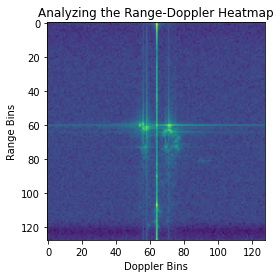

In [56]:
plt.imshow(range_doppler.T)
plt.xlabel('Doppler Bins')
plt.ylabel('Range Bins')
plt.title('Analyzing the Range-Doppler Heatmap')
plt.show()

In [57]:
range_azimuth.shape

NameError: name 'range_azimuth' is not defined

In [110]:
# Chirps x virtual antennas x ADC samples
print(frame.shape)
range_fft = np.fft.fft(frame, axis=2)
range_doppler = np.fft.fft(range_fft, axis=0)
range_doppler = np.fft.fftshift(range_doppler, axes=0)
num_angle_bins = 64
padding = ((0,0), (0,num_angle_bins-range_doppler.shape[1]), (0,0))
range_azimuth = np.pad(range_doppler, padding, mode='constant')
range_azimuth = np.fft.fft(range_azimuth, axis=1)
range_azimuth = np.fft.fftshift(range_azimuth, axes=1)
range_azimuth = range_azimuth

(128, 8, 128)


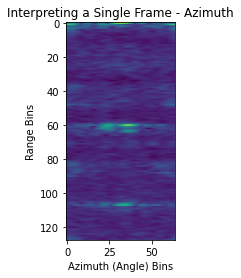

In [194]:
# Visualize Results
plt.imshow(np.log(np.abs(range_azimuth).sum(0).T))
plt.xlabel('Azimuth (Angle) Bins')
plt.ylabel('Range Bins')
plt.title('Interpreting a Single Frame - Azimuth')
plt.show()

In [139]:
# Data sampling configuration
c = 3e8 # Speed of light (m/s)
sample_rate = 2500 # Rate at which the radar samples from ADC (ksps - kilosamples per second)
freq_slope = 60 # Frequency slope of the chirp (MHz/us)
adc_samples = 128 # Number of samples from a single chirp
chirp_bandwidth = (freq_slope * 1e12 * adc_samples) / (sample_rate * 1e3)

range_res = c / (2 * chirp_bandwidth)
ranges = np.arange(adc_samples) * range_res
powers = np.abs(range_fft)

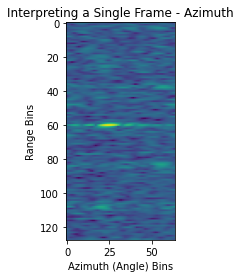

In [177]:
# Visualize Results
#plt.imshow(np.log(np.abs(range_azimuth).sum(0).T))
plt.imshow(np.log(np.abs(range_azimuth)[50:55,:,:].sum(0).T))
plt.xlabel('Azimuth (Angle) Bins')
plt.ylabel('Range Bins')
plt.title('Interpreting a Single Frame - Azimuth')
plt.show()

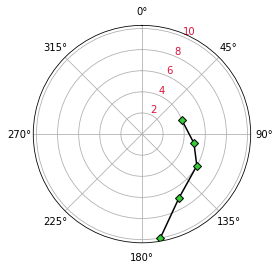

In [135]:
import numpy as np
import matplotlib.pyplot as plt

time = np.array([4 ,5 ,6, 7, 10])
azi = np.array([70 ,100 ,120, 150, 170])

ax = plt.subplot(111, projection='polar')
ax.plot(azi*np.pi/180, time, color='black', marker='D', markerfacecolor='limegreen')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1) # clockwise
ax.grid(True)

# ax.set_ylabel('Time', color='crimson')
ax.tick_params(axis='y', colors='crimson')

plt.show()


In [178]:
#Radar Pprocessing by functions
# Read in data
path = r'Presense Applied Radar\assets\doppler_example_1.npy'
frame = np.load(path)
# Manually cast to signed ints
frame.real = frame.real.astype(np.int16)
frame.imag = frame.imag.astype(np.int16)
print(f'Shape of frame: {frame.shape}')

Shape of frame: (128, 8, 128)


In [186]:
class Config:
    clutterRemovalEnabled = True
    numAngleBins = 64
    numDopplerBins = 128
    numVirtualAntAzim = 1
    numRxAntennas = 4
    numTxAntennas = 2
    rxChannelComp = None
    nearFieldCorrectionCfg = False
    extendedMaxVelocityEnabled = False
    extendedMaxVelocityEnabled = False

config = Config()


In [2]:
from mmwave.dsp.range_processing import range_processing
from mmwave.dsp.doppler_processing import doppler_processing,doppler_estimation
from mmwave.dsp.angle_estimation import azimuth_processing

In [3]:
path = r'Presense Applied Radar\assets\doppler_example_1.npy'
frame = np.load(path)

In [4]:
radar_cube = range_processing(frame)

In [5]:
detection_matrix,aoa_input = doppler_processing(radar_cube)

In [6]:
detection_matrix.shape

(128, 64)

In [2]:
from h5dataset import H5DatasetLoader
import numpy as np                  # Scientific Computing Library
import matplotlib.pyplot as plt     # Basic Visualization Library
data = H5DatasetLoader(r"E:\OneDrive - UNSW\PhD\Experiments\2021-06\openradar\data\indoor_sample_50.h5")



In [13]:
from config_v1 import read_radar_params
from v1 import RadarFrame
from mmwave import dsp

# Read config and configure RadarFrame object
radar_config = read_radar_params(r'indoor_human_rcs.cfg')
rf = RadarFrame(radar_config)
range_resolution = rf.range_resolution

In [14]:
range_resolution

0.04683764076549342

In [4]:
class Window:
    BARTLETT = 1
    BLACKMAN = 2
    HAMMING  = 3
    HANNING  = 4


In [5]:
radar_cube = np.swapaxes(data['radar'][0], 0, 2)

In [6]:
radar_cube.shape

(304, 8, 32)

In [7]:
range_cube = dsp.range_processing(radar_cube)
det_matrix, aoa_input = dsp.doppler_processing(radar_cube)

In [8]:
fft2d_sum = det_matrix.astype(np.int64)

thresholdDoppler, noiseFloorDoppler = np.apply_along_axis(func1d=dsp.ca_,
                                                            axis=0,
                                                            arr=fft2d_sum.T,
                                                            l_bound=1.5,
                                                            guard_len=4,
                                                            noise_len=16)

thresholdRange, noiseFloorRange = np.apply_along_axis(func1d=dsp.ca_,
                                                        axis=0,
                                                        arr=fft2d_sum,
                                                        l_bound=2.5,
                                                        guard_len=4,
                                                        noise_len=16)

thresholdDoppler, noiseFloorDoppler = thresholdDoppler.T, noiseFloorDoppler.T
det_doppler_mask = (det_matrix > thresholdDoppler)
det_range_mask = (det_matrix > thresholdRange)

# # Get indices of detected peaks
full_mask = (det_doppler_mask & det_range_mask)
det_peaks_indices = np.argwhere(full_mask == True)

# # peakVals and SNR calculation
peakVals = fft2d_sum[det_peaks_indices[:, 0], det_peaks_indices[:, 1]]
snr = peakVals - noiseFloorRange[det_peaks_indices[:, 0], det_peaks_indices[:, 1]]
numTxAntennas = 2
dtype_location = '(' + str(numTxAntennas) + ',)<f4'
dtype_detObj2D = np.dtype({'names': ['rangeIdx', 'dopplerIdx', 'peakVal', 'location', 'SNR'],
                             'formats': ['<i4', '<i4', '<f4', dtype_location, '<f4']})
detObj2DRaw = np.zeros((det_peaks_indices.shape[0],), dtype=dtype_detObj2D)
detObj2DRaw['rangeIdx'] = det_peaks_indices[:, 0].squeeze()
detObj2DRaw['dopplerIdx'] = det_peaks_indices[:, 1].squeeze()
detObj2DRaw['peakVal'] = peakVals.flatten()
detObj2DRaw['SNR'] = snr.flatten()
numDopplerBins = 304
# # Further peak pruning. This increases the point cloud density but helps avoid having too many detections around one object.
detObj2DRaw = dsp.prune_to_peaks(detObj2DRaw, det_matrix, numDopplerBins, reserve_neighbor=True)

# # --- Peak Grouping
detObj2D = dsp.peak_grouping_along_doppler(detObj2DRaw, det_matrix, numDopplerBins)
# SNRThresholds2 = np.array([[2, 23], [10, 11.5], [35, 16.0]])
# peakValThresholds2 = np.array([[4, 275], [1, 400], [500, 0]])
# detObj2D = dsp.range_based_pruning(detObj2D, SNRThresholds2, peakValThresholds2, numRangeBins, 0.5, range_resolution)

azimuthInput = aoa_input[detObj2D['rangeIdx'], :, detObj2D['dopplerIdx']]
print(azimuthInput.shape)
x, y, z = dsp.naive_xyz(azimuthInput.T,num_rx=4,num_tx=3)

(56, 16)
e:\OneDrive - UNSW\PhD\Experiments\2021-06\openradar\mmwave\dsp\angle_estimation.py:883: RuntimeWarning: invalid value encountered in sqrt
  y_vector = np.sqrt(1 - x_vector ** 2 - z_vector ** 2)


In [15]:
xyzVecN = np.zeros((3, x.shape[0]))
xyzVecN[0] = x * range_resolution * detObj2D['rangeIdx']
xyzVecN[1] = y * range_resolution * detObj2D['rangeIdx']
xyzVecN[2] = z * range_resolution * detObj2D['rangeIdx']

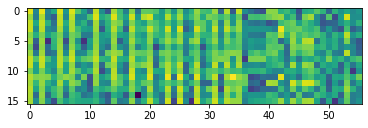

In [68]:
plt.figure()
plt.imshow(np.log(np.abs(azimuthInput.T)))
plt.show()


C:\Users\z5262974\AppData\Local\Temp/ipykernel_14208/2986473242.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


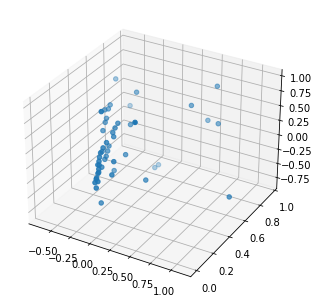

In [17]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
fig = pyplot.figure()
ax = Axes3D(fig)



ax.scatter(xyzVecN[0], xyzVecN[1], xyzVecN[2])
pyplot.show()